# Machine Learning in Financial Markets

We explore aspects of machine learning in finance. We will use different machine learning models (Logistic Regression, Random Forest Classifier, K Nearest Neighbors, Support Vector Classifier) to see if we can predict whether today's returns for HSBC stocks will be positive or negative based on the returns of the 4 previous days and we compare these models prediction accuracy.

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

We will focus on the stock prices from HSBC. We construct a dataframe with the daily returns from 1999-07-16 until today. Also, next to today's returns, we place the the returns from the 4 previous days. 

In [3]:
import yfinance as yf
import pandas as pd

# Define the stock and start date
start = pd.to_datetime('1999-07-16')
stock = ['HSBC']

# Fetch data using yfinance
data = yf.download(stock, start=start)['Adj Close']

# Proceed with your analysis
df = pd.DataFrame()
df['Today'] = (data / data.shift(1)) - 1

print(df.head())

df = pd.DataFrame()
df['Today'] = (data/data.shift(1))-1
df['Lag1'] = df['Today'].shift(1)
df['Lag2'] = df['Today'].shift(2)
df['Lag3'] = df['Today'].shift(3)
df['Lag4'] = df['Today'].shift(4)
df.dropna(inplace = True)
df.head(10)

[*********************100%%**********************]  1 of 1 completed

               Today
Date                
1999-07-16       NaN
1999-07-19  0.002014
1999-07-20 -0.021106
1999-07-21  0.002054
1999-07-22 -0.002050


,Today,Lag1,Lag2,Lag3,Lag4
Date,,,,,
1999-07-23,-0.054414,-0.002050,0.002054,-0.021106,0.002014
1999-07-26,0.007601,-0.054414,-0.002050,0.002054,-0.021106
1999-07-27,0.036638,0.007601,-0.054414,-0.002050,0.002054
1999-07-28,-0.020790,0.036638,0.007601,-0.054414,-0.002050
1999-07-29,-0.023354,-0.020790,0.036638,0.007601,-0.054414
1999-07-30,0.047826,-0.023354,-0.020790,0.036638,0.007601
1999-08-02,0.039419,0.047826,-0.023354,-0.020790,0.036638
1999-08-03,0.005988,0.039419,0.047826,-0.023354,-0.020790
1999-08-04,0.013889,0.005988,0.039419,0.047826,-0.023354


We construct an additional column to our data frame to indicate whether on a given day the returns were positive or negative. If the returns were positive we label this with 1, and with 0 otherwise.

In [4]:
def direction(x):
    if x>0:
        return 1.0
    else:
        return 0.0

In [5]:
df['Direction'] = df['Today'].apply(direction)
df.head()

,Today,Lag1,Lag2,Lag3,Lag4,Direction
Date,,,,,,
1999-07-23,-0.054414,-0.002050,0.002054,-0.021106,0.002014,0.0
1999-07-26,0.007601,-0.054414,-0.002050,0.002054,-0.021106,1.0
1999-07-27,0.036638,0.007601,-0.054414,-0.002050,0.002054,1.0
1999-07-28,-0.020790,0.036638,0.007601,-0.054414,-0.002050,0.0
1999-07-29,-0.023354,-0.020790,0.036638,0.007601,-0.054414,0.0


We will now use machine learning models to try to predict whether a share will have a positive return (labeled as 1) or a negative return (labeled as 0) based on the values of the returns from the 4 previous days. For this, we build our test and train data sets. We set the date 2019-01-01 as the begining of our test sets.

In [6]:
X = df[['Lag1','Lag2','Lag3','Lag4']]
y = df['Direction']

In [76]:
start_test = pd.to_datetime('2024-01-01')

X_train = X[X.index < start_test]
X_test = X[X.index >= start_test]
y_train = y[y.index < start_test]
y_test = y[y.index >= start_test]

# ===============================================

## Logistic Regression

We implement the logistic regression model:

In [8]:
logmodel = LogisticRegression(C = 10.0,solver='lbfgs')
logmodel.fit(X_train,y_train)

LogisticRegression(C=10.0)

In [9]:
pred = logmodel.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the model name and separator
print('Logistic Regression Model')
print('=' * 75)  # 25 '===' separators

# Print the classification report
print('Classification Report')
print(classification_report(y_test, pred))
print('=' * 75)

# Print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('=' * 75)

# Print the accuracy of the model
accuracy = round(logmodel.score(X_test, y_test), 2)
print(f'Accuracy: {accuracy}')



Logistic Regression Model
Classification Report
              precision    recall  f1-score   support

         0.0       0.44      0.44      0.44        63
         1.0       0.62      0.61      0.61        92

    accuracy                           0.54       155
   macro avg       0.53      0.53      0.53       155
weighted avg       0.54      0.54      0.54       155

Confusion Matrix
[[28 35]
 [36 56]]
Accuracy: 0.54


The model has a 0.54 accuracy, which is no much better than a flip coin.

# =============================================

## Random Forest Classifier

In [11]:
rfc = RandomForestClassifier(n_estimators=5000)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5000)

In [12]:
pred = rfc.predict(X_test)

In [13]:
print('Random Forest Classifier Model')
print(25 * '===')

# Print the classification report
print(classification_report(y_test, pred))
print(25 * '===')

# Print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print(25 * '===')

# Calculate and round the accuracy
accuracy = round(rfc.score(X_test, y_test), 2)

# Print the rounded accuracy
print('Accuracy:', accuracy)


Random Forest Classifier Model
              precision    recall  f1-score   support

         0.0       0.43      0.56      0.49        63
         1.0       0.62      0.50      0.55        92

    accuracy                           0.52       155
   macro avg       0.53      0.53      0.52       155
weighted avg       0.54      0.52      0.53       155

Confusion Matrix
[[35 28]
 [46 46]]
Accuracy: 0.52


Thus, we see that the accuracy is worse than that of the Logistic Regression Model.

# ==============================================

## K Nearest Neighbors 

We start the implementation of this model with a number of $K = 100$ nearest neighbors.

In [14]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [15]:
pred = knn.predict(X_test)

In [16]:
print('KNN Model')
print(25 * '===')

# Print the classification report
print(classification_report(y_test, pred))
print(25 * '===')

# Print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print(25 * '===')

# Calculate and round the accuracy
accuracy = round(knn.score(X_test, y_test), 2)

# Print the rounded accuracy
print('Accuracy:', accuracy)


KNN Model
              precision    recall  f1-score   support

         0.0       0.42      0.40      0.41        63
         1.0       0.60      0.62      0.61        92

    accuracy                           0.53       155
   macro avg       0.51      0.51      0.51       155
weighted avg       0.53      0.53      0.53       155

Confusion Matrix
[[25 38]
 [35 57]]
Accuracy: 0.53


We now compute the error rate (i.e. how many times the predictions are different from the actual y_test set) for different values of K. We plot and check where the error is smaller. 

In [17]:
error_rate = []

# Will take some time
for i in range(1,500,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

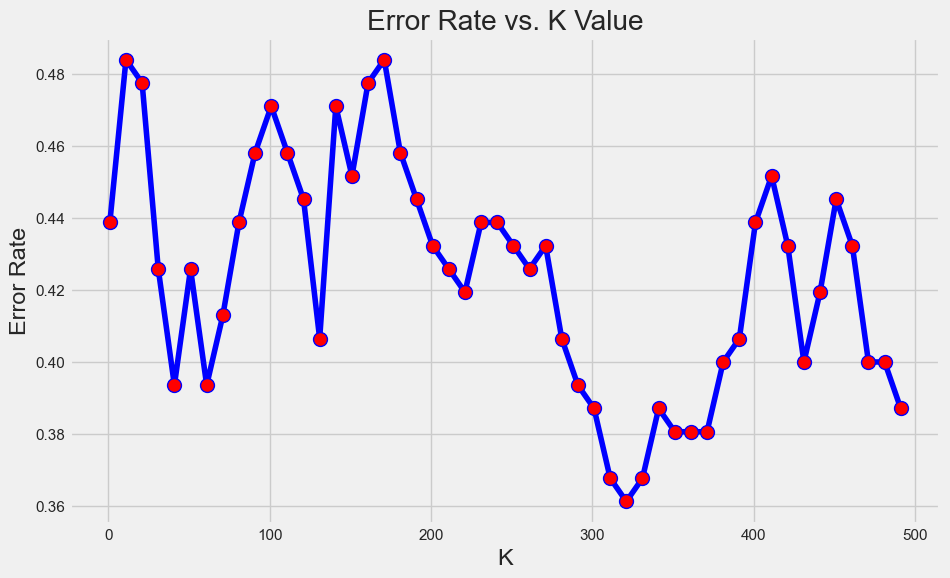

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,500,10),error_rate,color='blue', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

We see that the erros is smaller around $K = 320$. Let us try with that value:

In [69]:
knn = KNeighborsClassifier(n_neighbors=320)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=320)

In [70]:
pred = knn.predict(X_test)

In [71]:
print('KNN Model')
print(25 * '===')

# Print the classification report
print(classification_report(y_test, pred))
print(25 * '===')

# Print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print(25 * '===')

# Calculate and round the accuracy
accuracy = round(knn.score(X_test, y_test), 2)

# Print the rounded accuracy
print('Accuracy:', accuracy)


KNN Model
              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55        63
         1.0       0.70      0.75      0.72        92

    accuracy                           0.66       155
   macro avg       0.64      0.64      0.64       155
weighted avg       0.65      0.66      0.65       155

Confusion Matrix
[[33 30]
 [23 69]]
Accuracy: 0.66


So, the accuracy climbed form 0.53 to 0.66.

# =============================================

## Support Vector Classifier

In [72]:
model = SVC(gamma='scale')
model.fit(X_train,y_train)

SVC()

In [73]:
pred = model.predict(X_test)

In [74]:
print('SVC Model')
print(25 * '===')

# Ensure 'pred' is defined with the predictions from your SVC model
pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, pred))
print(25 * '===')

# Print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print(25 * '===')

# Calculate and round the accuracy
accuracy = round(model.score(X_test, y_test), 2)

# Print the rounded accuracy
print('Accuracy:', accuracy)


SVC Model
              precision    recall  f1-score   support

         0.0       0.49      0.30      0.37        63
         1.0       0.62      0.78      0.69        92

    accuracy                           0.59       155
   macro avg       0.55      0.54      0.53       155
weighted avg       0.57      0.59      0.56       155

Confusion Matrix
[[19 44]
 [20 72]]
Accuracy: 0.59


We try to optimize the parameters of the SVC model:

In [39]:
param_grid = {'C': [0.1,1, 10, 100, 1000,1000000.0], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [40]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)

In [41]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   1.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   1.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.504 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 1000000.0],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

The optimal parameters are:

In [42]:
grid.best_params_

{'C': 1000000.0, 'gamma': 1, 'kernel': 'rbf'}

In [44]:
grid.best_estimator_

SVC(C=1000000.0, gamma=1)

In [45]:
grid_predictions = grid.predict(X_test)

In [75]:
print('Optimized SVC Model')
print(25 * '===')

# Print the classification report
print(classification_report(y_test, grid_predictions))
print(25 * '===')

# Print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, grid_predictions))
print(25 * '===')

# Calculate and round the accuracy
accuracy = round(model.score(X_test, y_test), 2)

# Print the rounded accuracy
print('Accuracy:', accuracy)


Optimized SVC Model
              precision    recall  f1-score   support

         0.0       0.45      0.35      0.39        63
         1.0       0.61      0.71      0.66        92

    accuracy                           0.56       155
   macro avg       0.53      0.53      0.52       155
weighted avg       0.55      0.56      0.55       155

Confusion Matrix
[[22 41]
 [27 65]]
Accuracy: 0.59


And the accuracy of the model again decrease from 0.66 to 0.59. However, there seems to be far fewer correct predictions than in the non-optimized model.

The bottom line is that only one model thus implemente have an accuracy better than 0.6. This maybe due to the fact that stock prices follow a Weiner process, and thus the returns on a given day have a dependence on the previous returns that should diminish very rapidly from the first day on. Also, we are not taking into consideration data that may reflect the normality of the returns distribution.  